In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
import time as t
import matplotlib.pyplot as plt
import numpy as np


In [18]:
#Importing the MNIST-fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [19]:
#The class names are not included with the dataset, so we need to add them manually
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#Divide each iamge by 255 to normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0


/var/folders/gx/rjvt3w81017_cp1lyj8sxr480000gn/T/ipykernel_4397/2018826413.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


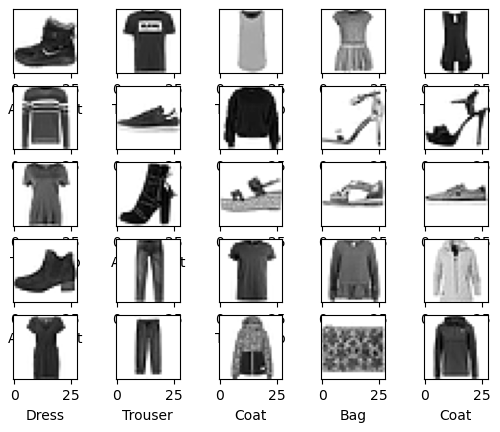

In [72]:
#Illustrating the first 25 images in the dataset
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()


In [21]:
#Creating the models for each optimizer
train_adam_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
train_SGD_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) ])

train_RMSprop_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) ])

train_Adagrad_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) ])

In [22]:
#Compiling the model for every iptimizer
train_adam_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_SGD_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_RMSprop_model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_Adagrad_model.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
#Place holder i 
previous_i = 0 

#Lists for history of accuracy and loss on train set

adam_acc_history = []
adam_loss_history = []
SGD_acc_history = []
SGD_loss_history = []
RMSprop_acc_history = []
RMSprop_loss_history = []
Adagrad_acc_history = []
Adagrad_loss_history = []

#Lists for accuracy on test set
adam_acc_list = []
SGD_acc_list = []
RMSprop_acc_list = []
ADAgrad_acc_list = []
#Lists for time
adam_time_list = []
SGD_time_list = []
RMSprop_time_list = []
ADAgrad_time_list = []
#For loop which trains 500 epochs for every model, measures time and accuracy on test and train set and entropy loss at every epoch
for i in range(500):
    #Training and time
    adam_start = t.time()
    adam_history = train_adam_model.fit(train_images, train_labels, epochs= 1)
    adam_time = t.time() - adam_start
    sgd_start = t.time()
    SGD_history = train_SGD_model.fit(train_images, train_labels, epochs= 1)
    sgd_time = t.time() - sgd_start
    RMSprop_start = t.time()
    RMS_historty = train_RMSprop_model.fit(train_images, train_labels, epochs= 1)
    RMSprop_time = t.time() - RMSprop_start
    ADAgrad_start = t.time()
    ADAgrad_history = train_Adagrad_model.fit(train_images, train_labels, epochs= 1)
    ADAgrad_time = t.time() - ADAgrad_start
    #Test accuracy 
    adamtest_loss, adamtest_acc = train_adam_model.evaluate(test_images,  test_labels, verbose=2)
    SGDtest_loss, SGDtest_acc = train_SGD_model.evaluate(test_images,  test_labels, verbose=2)
    RMSproptest_loss, RMSproptest_acc = train_RMSprop_model.evaluate(test_images,  test_labels, verbose=2)
    ADAgradtest_loss, ADAgradtest_acc = train_Adagrad_model.evaluate(test_images,  test_labels, verbose=2)
    #Appending to lists accuracy 
    adam_acc_list.append(adamtest_acc)
    SGD_acc_list.append(SGDtest_acc)
    RMSprop_acc_list.append(RMSproptest_acc)
    ADAgrad_acc_list.append(ADAgradtest_acc)
    #Appending to lists time
    if i == 0:
        adam_time_list.append(adam_time)
        SGD_time_list.append(sgd_time)
        RMSprop_time_list.append(RMSprop_time)
        ADAgrad_time_list.append(ADAgrad_time)
    else:
        adam_time_list.append(adam_time + adam_time_list[previous_i])
        SGD_time_list.append(sgd_time + SGD_time_list[previous_i])
        RMSprop_time_list.append(RMSprop_time + RMSprop_time_list[previous_i])
        ADAgrad_time_list.append(ADAgrad_time + ADAgrad_time_list[previous_i])
        previous_i = i
    #Adding to history lists
    adam_acc_history += adam_history.history['accuracy']
    adam_loss_history += adam_history.history['loss']
    SGD_acc_history += SGD_history.history['accuracy']
    SGD_loss_history += SGD_history.history['loss']
    RMSprop_acc_history += RMS_historty.history['accuracy']
    RMSprop_loss_history += RMS_historty.history['loss']
    Adagrad_acc_history += ADAgrad_history.history['accuracy']
    Adagrad_loss_history += ADAgrad_history.history['loss']







    

1875/1875 [==============================] - 2s 973us/step - loss: 1.0753 - accuracy: 0.6719
313/313 - 0s - loss: 0.4434 - accuracy: 0.8382 - 267ms/epoch - 854us/step
313/313 - 0s - loss: 0.5627 - accuracy: 0.8105 - 255ms/epoch - 814us/step
313/313 - 0s - loss: 0.4938 - accuracy: 0.8288 - 256ms/epoch - 818us/step
313/313 - 0s - loss: 0.8064 - accuracy: 0.7351 - 252ms/epoch - 804us/step
1875/1875 [==============================] - 2s 981us/step - loss: 0.7238 - accuracy: 0.7672
313/313 - 0s - loss: 0.3967 - accuracy: 0.8612 - 183ms/epoch - 586us/step
313/313 - 0s - loss: 0.5181 - accuracy: 0.8180 - 188ms/epoch - 600us/step
313/313 - 0s - loss: 0.4025 - accuracy: 0.8548 - 184ms/epoch - 589us/step
313/313 - 0s - loss: 0.6956 - accuracy: 0.7704 - 188ms/epoch - 600us/step
1875/1875 [==============================] - 2s 907us/step - loss: 0.6478 - accuracy: 0.7921
313/313 - 0s - loss: 0.3877 - accuracy: 0.8636 - 186ms/epoch - 593us/step
313/313 - 0s - loss: 0.4777 - accuracy: 0.8316 - 188ms/

In [25]:
%matplotlib inline

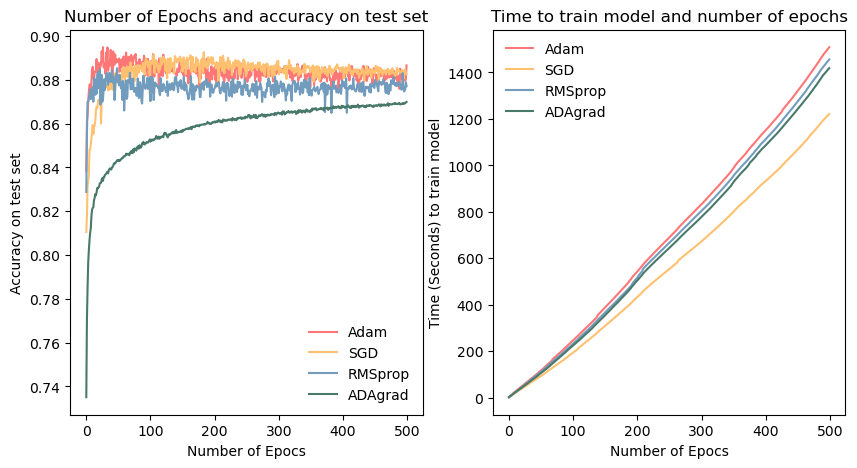

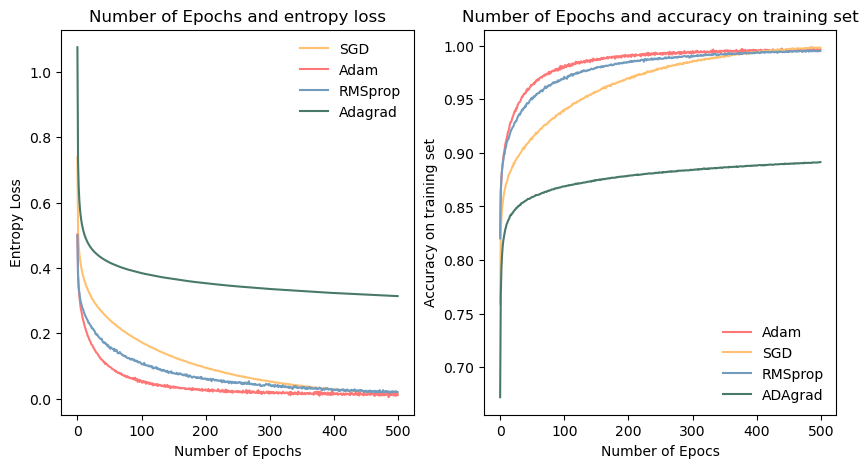

In [70]:

#Plotting test set accuracy
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.savefig('accuracy_test.pdf')
ax[0].plot(adam_acc_list, label = "Adam", color = '#ff7676')
ax[0].plot(SGD_acc_list, label = "SGD", color = '#FFC170')
ax[0].plot(RMSprop_acc_list, label = "RMSprop", color = '#729CBD')
ax[0].plot(ADAgrad_acc_list, label = "ADAgrad", color = '#49796b')
ax[0].legend(frameon = False)
ax[0].set_xlabel('Number of Epocs')
ax[0].set_ylabel('Accuracy on test set')
ax[0].set_title('Number of Epochs and accuracy on test set')
#plotting time
ax[1].plot(adam_time_list, label = "Adam",color = '#ff7676')
ax[1].plot(SGD_time_list, label = "SGD", color = '#FFC170')
ax[1].plot(RMSprop_time_list, label = "RMSprop", color = '#729CBD')
ax[1].plot(ADAgrad_time_list, label = "ADAgrad", color = '#49796b')
ax[1].set_xlabel('Number of Epocs')
ax[1].set_ylabel('Time (Seconds) to train model')
ax[1].set_title('Time to train model and number of epochs')
ax[1].legend(frameon = False)
plt.show()
fig.savefig('time_and_accuracy.pdf')
plt.close(fig)
#Plotting test set entropy loss
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(SGD_loss_history, label='SGD', color = '#FFC170')
ax[0].plot(adam_loss_history, label='Adam', color = '#ff7676')
ax[0].plot(RMSprop_loss_history, label='RMSprop', color = '#729CBD')
ax[0].plot(Adagrad_loss_history, label='Adagrad', color = '#49796b')
ax[0].legend(frameon = False)
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Entropy Loss')
ax[0].set_title('Number of Epochs and entropy loss')
#Plotting test set accuracy
ax[1].plot(adam_acc_history, label = "Adam", color = '#ff7676')
ax[1].plot(SGD_acc_history, label = "SGD", color = '#FFC170')
ax[1].plot(RMSprop_acc_history, label = "RMSprop", color = '#729CBD')
ax[1].plot(Adagrad_acc_history, label = "ADAgrad", color = '#49796b')
ax[1].set_xlabel('Number of Epocs')
ax[1].set_ylabel('Accuracy on training set')
ax[1].set_title('Number of Epochs and accuracy on training set')
ax[1].legend(frameon = False)
fig.savefig('accuracy_training_and_entropy.pdf')
plt.show()
plt.close(fig)

